# Assignment

## EXPLORATORY DATA ANALYSIS OF HABERMAN SURVIVAL DATA SET


Title: Haberman's Survival Data

Sources: (a) Donor: Tjen-Sien Lim (limt@stat.wisc.edu) (b) Date: March 4, 1999

Past Usage:

Haberman, S. J. (1976). Generalized Residuals for Log-Linear Models, Proceedings of the 9th International Biometrics Conference, Boston, pp. 104-122.
Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984), Graphical Models for Assessing Logistic Regression Models (with discussion), Journal of the American Statistical Association 79: 61-83.
Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis, Department of Statistics, University of Wisconsin, Madison, WI.
Relevant Information: The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Number of Instances: 306

Number of Attributes: 4 (including the class attribute)

Attribute Information:

Age of patient at time of operation (numerical)
Patient's year of operation (year - 1900, numerical)
Number of positive axillary nodes detected (numerical)
Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year
Missing Attribute Values: None

### Objective:-
To predict Survival of patients who had undergone surgery for breast cancer will survive more than 5 years or expired with in 5 years

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
haberman=pd.read_csv('haberman.csv') #Reading csv file
haberman.head()


,Age,Operation_year,axil_nodes,Surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [2]:
# (Q) How many data points are there?
print(haberman.shape)

(306, 4)


In [3]:
# (Q) what are the columns name in our dataset?
print(haberman.columns)

Index(['Age', 'Operation_year', 'axil_nodes', 'Surv_status'], dtype='object')


Surv_status is class label(output) it is dependent feature

Age,Operation_year,axil_nodes are inputs these are independent features

In [4]:
# (Q) How many datapoints for each class are present?
haberman['Surv_status'].value_counts()


1    225
2     81
Name: Surv_status, dtype: int64

## converting numerical feature into categorical feature

In [5]:
haberman['Surv_status']=haberman['Surv_status'].apply(lambda x: "survived" if x==1 else "expired")
haberman['Surv_status'].head(10)

0    survived
1    survived
2    survived
3    survived
4    survived
5    survived
6    survived
7     expired
8     expired
9    survived
Name: Surv_status, dtype: object

In [6]:
#Finding the percentage of datapoints for each type of class
print("The percentage of datapoints for each type of class:")
haberman['Surv_status'].value_counts()*100/haberman.shape[0]


The percentage of datapoints for each type of class:


survived    73.529412
expired     26.470588
Name: Surv_status, dtype: float64

This implies Haberman survival dataset is an imbalanced dataset

### 2-D Scatter Plots


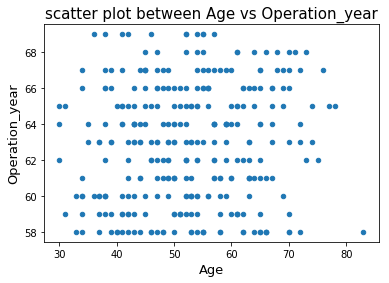

In [7]:
#2-D Scatter Plot
haberman.plot(kind='scatter',x='Age',y='Operation_year')
plt.xlabel('Age',size=13)
plt.ylabel('Operation_year',size=13)
plt.title('scatter plot between Age vs Operation_year',size=15)
plt.show()


observation:
1.Here X-axis corresponds to  Age, varies from 30 to 80 and Y-axis corresponds
to Operation_year varies from 58 to 68
All the points are of same color we cannot determine this particular point belongs to particular
class so we go for color coding

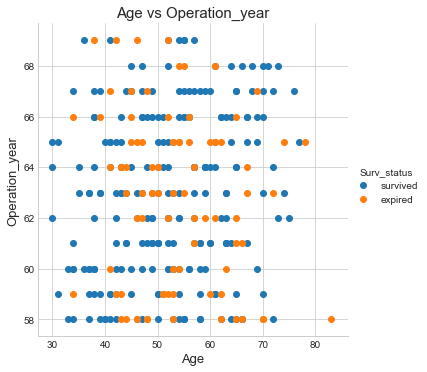

In [8]:
#2-D scatter plot with color coding
sns.set_style("whitegrid")
sns.FacetGrid(haberman,hue='Surv_status',size=5)\
   .map(plt.scatter,'Age','Operation_year')\
    .add_legend()
plt.xlabel('Age',size=13)
plt.ylabel('Operation_year',size=13)
plt.title('Age vs Operation_year',size=15)
plt.show()

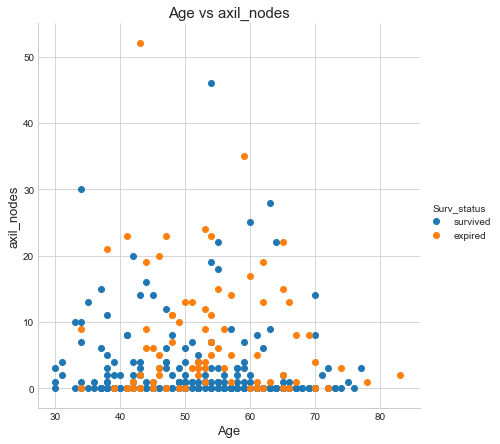

In [9]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman,hue='Surv_status',size=6)\
   .map(plt.scatter,'Age','axil_nodes')\
    .add_legend()
plt.xlabel('Age',size=13)
plt.ylabel('axil_nodes',size=13)
plt.title('Age vs axil_nodes',size=15)
plt.show()

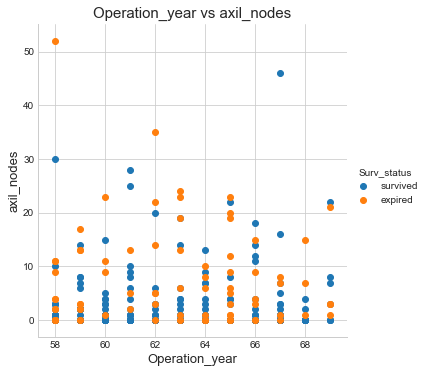

In [10]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman,hue='Surv_status',size=5)\
   .map(plt.scatter,'Operation_year','axil_nodes')\
    .add_legend()
plt.xlabel('Operation_year',size=13)
plt.ylabel('axil_nodes',size=13)
plt.title('Operation_year vs axil_nodes',size=15)
plt.show()

Observations:-
using Age and Operation_year Overlapping is more so we cannot separate points.so we go for better visualization.

we can draw multiple scatter plots by using pairplots

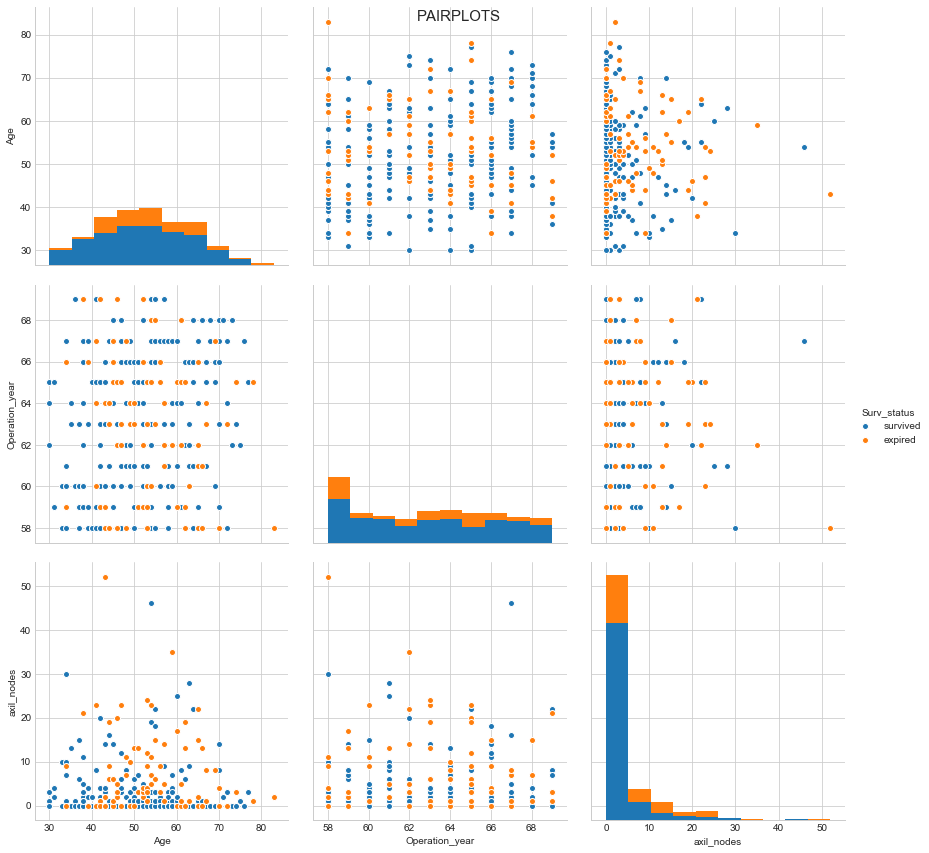

In [11]:
#pair plots 
plt.close()
sns.set_style("whitegrid")
sns.pairplot(haberman,hue='Surv_status',vars=['Age','Operation_year','axil_nodes'],size=4)
plt.suptitle("PAIRPLOTS",size=15)
plt.show()


Observations:-

Operation_year and axil_nodes are most useful features to identify Surv_status,

Age and axil_nodes  gives better visualization while compared to other plots

## Univariate Analysis

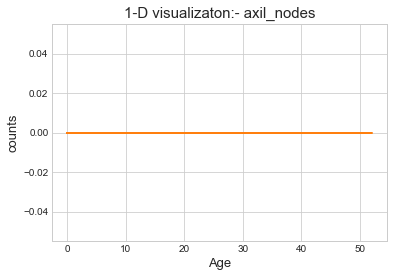

In [12]:
haberman_survived=haberman.loc[haberman['Surv_status']=='survived']
haberman_expired=haberman.loc[haberman['Surv_status']=='expired']
plt.plot(haberman_survived['axil_nodes'],np.zeros_like(haberman_survived['axil_nodes']))
plt.plot(haberman_expired['axil_nodes'],np.zeros_like(haberman_expired['axil_nodes']))
plt.xlabel('Age',size=13)
plt.ylabel('counts',size=13)
plt.title("1-D visualizaton:- axil_nodes",size=15)
plt.show()


In above plot all the ponits lie on one by one so we brake region into smaller buckets

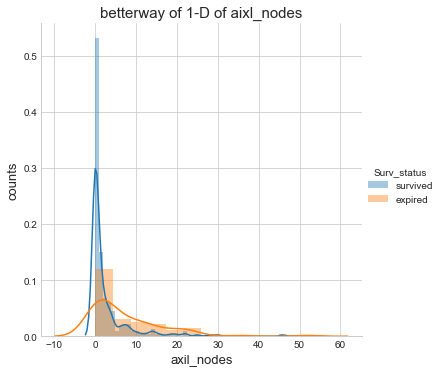

In [13]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman,hue='Surv_status',size=5)\
   .map(sns.distplot,'axil_nodes')\
    .add_legend()
plt.xlabel('axil_nodes',size=13)
plt.ylabel('counts',size=13)
plt.title('betterway of 1-D of aixl_nodes',size=15)
plt.show()

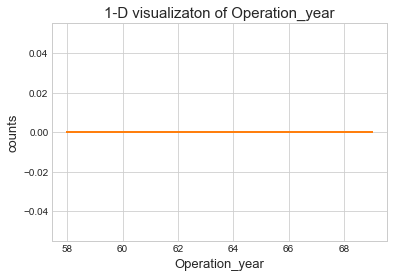

In [14]:
haberman_survived=haberman.loc[haberman['Surv_status']=='survived']
haberman_expired=haberman.loc[haberman['Surv_status']=='expired']
plt.plot(haberman_survived['Operation_year'],np.zeros_like(haberman_survived['Operation_year']))
plt.plot(haberman_expired['Operation_year'],np.zeros_like(haberman_expired['Operation_year']))
plt.xlabel('Operation_year',size=13)
plt.ylabel('counts',size=13)
plt.title("1-D visualizaton of Operation_year",size=15)
plt.show()


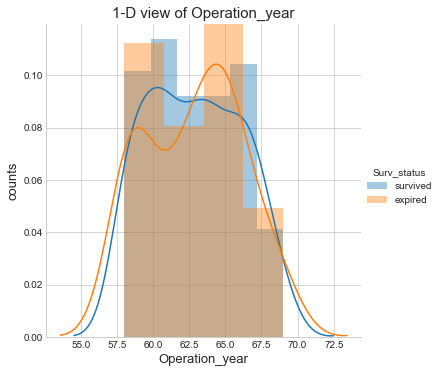

In [15]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman,hue='Surv_status',size=5)\
   .map(sns.distplot,'Operation_year')\
    .add_legend()
plt.xlabel('Operation_year',size=13)
plt.ylabel('counts',size=13)
plt.title('1-D view of Operation_year',size=15)
plt.show()

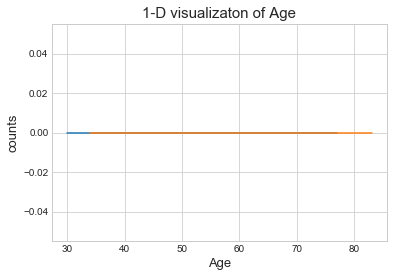

In [16]:
haberman_survived=haberman.loc[haberman['Surv_status']=='survived']
haberman_expired=haberman.loc[haberman['Surv_status']=='expired']
plt.plot(haberman_survived['Age'],np.zeros_like(haberman_survived['Age']))
plt.plot(haberman_expired['Age'],np.zeros_like(haberman_expired['Age']))
plt.xlabel('Age',size=13)
plt.ylabel('counts',size=13)
plt.title("1-D visualizaton of Age",size=15)
plt.show()


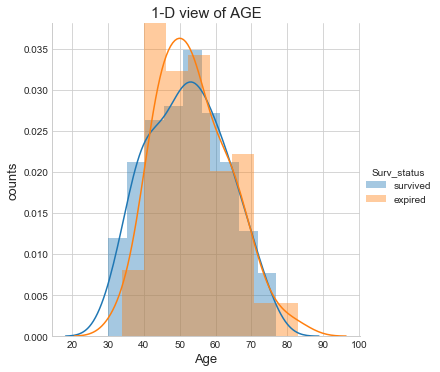

In [17]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman,hue='Surv_status',size=5)\
   .map(sns.distplot,'Age')\
    .add_legend()
plt.xlabel('Age',size=13)
plt.ylabel('counts',size=13)
plt.title('1-D view of AGE',size=15)
plt.show()

Observations:-
Age and Operation_year overlapping is more.

In axil_nodes the overlapping is less.



### PDF'S and CDF'S

PDF says that how many patients are survived.it can't say percentile value

PDF of axil_nodes
[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


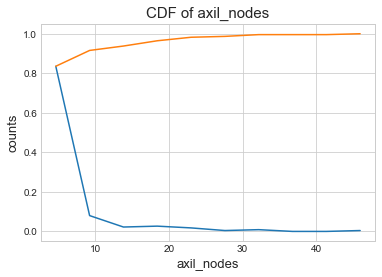

In [18]:
counts_survived,bin_edges_survived=np.histogram(haberman_survived['axil_nodes'],bins=10,density=True)
pdf_survived=counts_survived/(sum(counts_survived))
print("PDF of axil_nodes")
print(pdf_survived)
print(bin_edges_survived)
cdf_survived=np.cumsum(pdf_survived)
plt.plot(bin_edges_survived[1:],pdf_survived)
plt.plot(bin_edges_survived[1:],cdf_survived)
plt.xlabel('axil_nodes',size=13)
plt.ylabel('counts',size=13)
plt.title('CDF of axil_nodes',size=15)
plt.show()

PDF of axil_nodes
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


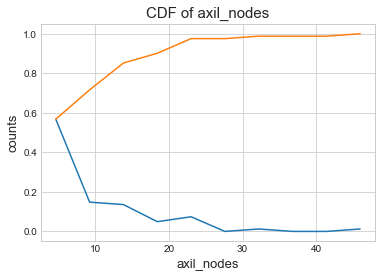

In [19]:
counts_expired,bin_edges_expired=np.histogram(haberman_expired['axil_nodes'],bins=10,density=True)
pdf_expired=counts_expired/(sum(counts_expired))
print("PDF of axil_nodes")
print(pdf_expired)
print(bin_edges_expired)

cdf_expired=np.cumsum(pdf_expired)
plt.plot(bin_edges_survived[1:],pdf_expired)
plt.plot(bin_edges_survived[1:],cdf_expired)
plt.xlabel('axil_nodes',size=13)
plt.ylabel('counts',size=13)
plt.title('CDF of axil_nodes',size=15)
plt.show()

PDF of Operation_year
[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


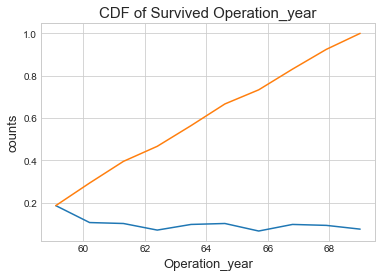

In [20]:
counts_survived,bin_edges_survived=np.histogram(haberman_survived['Operation_year'],bins=10,density=True)
pdf_survived=counts_survived/(sum(counts_survived))
print("PDF of Operation_year")
print(pdf_survived)
print(bin_edges_survived)

cdf_survived=np.cumsum(pdf_survived)
plt.plot(bin_edges_survived[1:],pdf_survived)
plt.plot(bin_edges_survived[1:],cdf_survived)
plt.xlabel('Operation_year',size=13)
plt.ylabel('counts',size=13)
plt.title('CDF of Survived Operation_year',size=15)
plt.show()

PDF of Operation_year
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


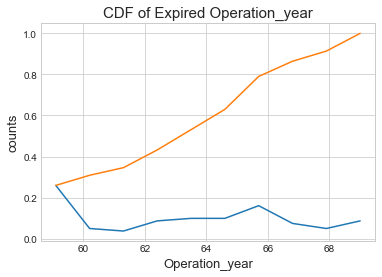

In [21]:
counts_expired,bin_edges_expired=np.histogram(haberman_expired['Operation_year'],bins=10,density=True)
pdf_expired=counts_expired/(sum(counts_expired))
print("PDF of Operation_year")
print(pdf_expired)
print(bin_edges_expired)

cdf_expired=np.cumsum(pdf_expired)
plt.plot(bin_edges_survived[1:],pdf_expired)
plt.plot(bin_edges_survived[1:],cdf_expired)
plt.xlabel('Operation_year',size=13)
plt.ylabel('counts',size=13)
plt.title('CDF of Expired Operation_year',size=15)
plt.show()

PDF of Age
[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


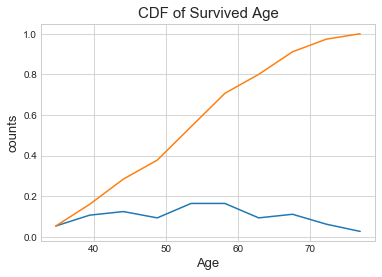

In [22]:
counts_survived,bin_edges_survived=np.histogram(haberman_survived['Age'],bins=10,density=True)
pdf_survived=counts_survived/(sum(counts_survived))
print("PDF of Age")
print(pdf_survived)
print(bin_edges_survived)

cdf_survived=np.cumsum(pdf_survived)
plt.plot(bin_edges_survived[1:],pdf_survived)
plt.plot(bin_edges_survived[1:],cdf_survived)
plt.xlabel('Age',size=13)
plt.ylabel('counts',size=13)
plt.title('CDF of Survived Age',size=15)
plt.show()

PDF of Age
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


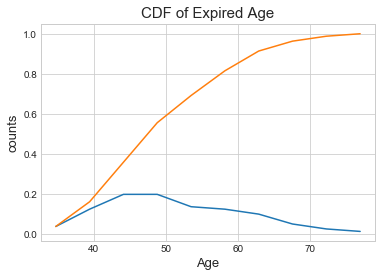

In [23]:
counts_expired,bin_edges_expired=np.histogram(haberman_expired['Age'],bins=10,density=True)
pdf_expired=counts_expired/(sum(counts_expired))
print("PDF of Age")
print(pdf_expired)
print(bin_edges_expired)

cdf_expired=np.cumsum(pdf_expired)
plt.plot(bin_edges_survived[1:],pdf_expired)
plt.plot(bin_edges_survived[1:],cdf_expired)
plt.xlabel('Age',size=13)
plt.ylabel('counts',size=13)
plt.title('CDF of Expired Age',size=15)
plt.show()

Observation:-
From CDF we can get percentile value but in pdf we can't get it

## Calculating Mean,Median,Standard deviation,Median absolute Deviation

In [24]:
print("Means")
print(np.mean(haberman_survived['axil_nodes']))
print(np.mean(np.append(haberman_survived['axil_nodes'],81)))
print(np.mean(haberman_expired['axil_nodes']))

print("Medians")
print(np.median(haberman_survived['axil_nodes']))
print(np.median(np.append(haberman_survived['axil_nodes'],81)))
print(np.median(haberman_expired['axil_nodes']))

print("Standard Deviaton")
print(np.std(haberman_survived['axil_nodes']))
print(np.std(haberman_expired['axil_nodes']))

print("Quantiles")
print(np.percentile(haberman_survived['axil_nodes'],np.arange(0,100,25)))
print(np.percentile(haberman_expired['axil_nodes'],np.arange(0,100,25)))

print("Percentiles")
print(np.percentile(haberman_survived['axil_nodes'],90))
print(np.percentile(haberman_expired['axil_nodes'],90))

print("Median Absolute Deviation")
from statsmodels import robust
print(robust.mad(haberman_survived['axil_nodes']))
print(robust.mad(haberman_expired['axil_nodes']))


Means
2.7911111111111113
3.1371681415929205
7.45679012345679
Medians
0.0
0.0
4.0
Standard Deviaton
5.857258449412131
9.128776076761632
Quantiles
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]
Percentiles
8.0
20.0
Median Absolute Deviation
0.0
5.930408874022408


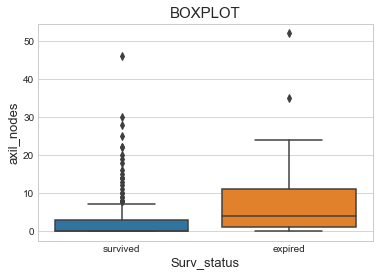

In [25]:
#Box plot
sns.set_style("whitegrid")
sns.boxplot(x='Surv_status',y='axil_nodes',data=haberman)
plt.title("BOXPLOT",size=15)
plt.xlabel('Surv_status',size=13)
plt.ylabel('axil_nodes',size=13)
plt.show()

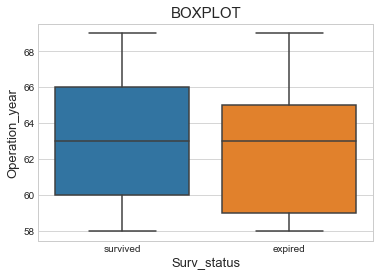

In [26]:
#Box plot
sns.set_style("whitegrid")
sns.boxplot(x='Surv_status',y='Operation_year',data=haberman)
plt.title("BOXPLOT",size=15)
plt.xlabel('Surv_status',size=13)
plt.ylabel('Operation_year',size=13)
plt.show()

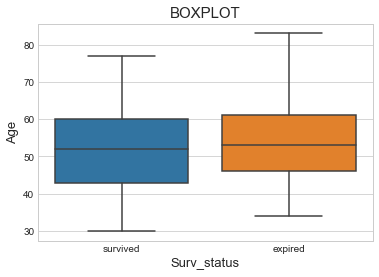

In [27]:
#Box plot
sns.set_style("whitegrid")
sns.boxplot(x='Surv_status',y='Age',data=haberman)
plt.title("BOXPLOT",size=15)
plt.xlabel('Surv_status',size=13)
plt.ylabel('Age',size=13)
plt.show()

Results:-

Boxplots take the ideas of Mean,Median,Quantiles it will place under one platform 

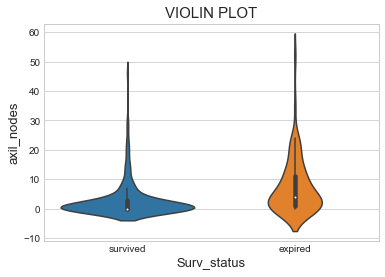

In [28]:
sns.violinplot(x='Surv_status',y='axil_nodes',data=haberman)
plt.xlabel('Surv_status',size=13)
plt.ylabel('axil_nodes',size=13)
plt.title('VIOLIN PLOT',size=15)
plt.show()

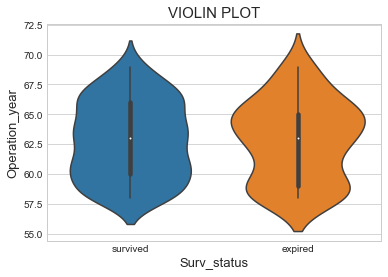

In [29]:
sns.violinplot(x='Surv_status',y='Operation_year',data=haberman)
plt.xlabel('Surv_status',size=13)
plt.ylabel('Operation_year',size=13)
plt.title('VIOLIN PLOT',size=15)
plt.show()

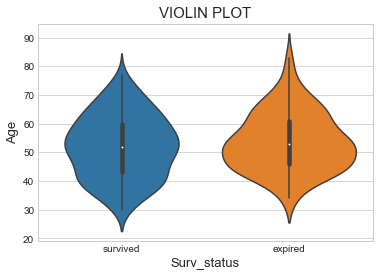

In [30]:
sns.violinplot(x='Surv_status',y='Age',data=haberman)
plt.xlabel('Surv_status',size=13)
plt.ylabel('Age',size=13)
plt.title('VIOLIN PLOT',size=15)
plt.show()

Results:-
Violin Plot takes the ideas of boxplot,Histogram,CDF  plots a plot

# Contour Plots

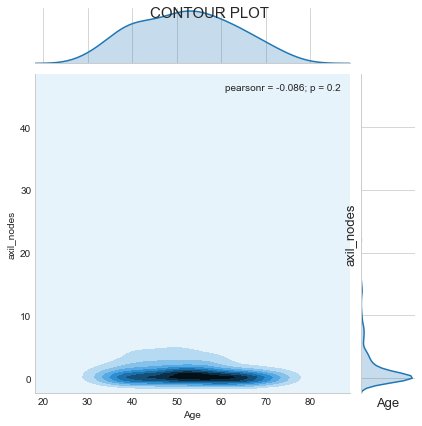

In [31]:
sns.jointplot(x='Age',y='axil_nodes',data=haberman_survived,kind='kde',)
plt.suptitle('CONTOUR PLOT',size=15)
plt.xlabel('Age',size=13)
plt.ylabel('axil_nodes',size=13)
plt.show()

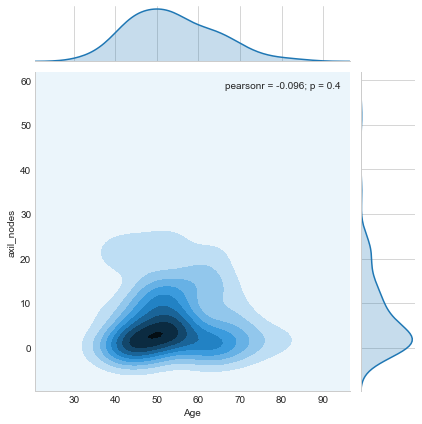

In [32]:
sns.jointplot(x='Age',y='axil_nodes',data=haberman_expired,kind='kde')
plt.show()

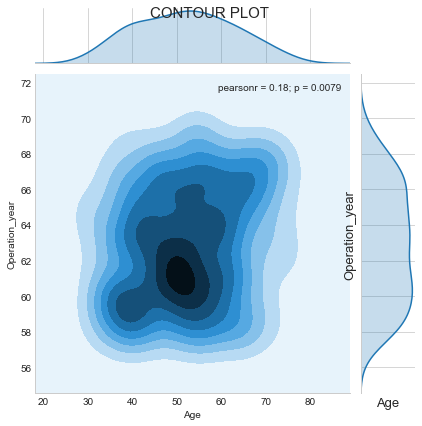

In [33]:
sns.jointplot(x='Age',y='Operation_year',data=haberman_survived,kind='kde',)
plt.suptitle('CONTOUR PLOT',size=15)
plt.xlabel('Age',size=13)
plt.ylabel('Operation_year',size=13)
plt.show()

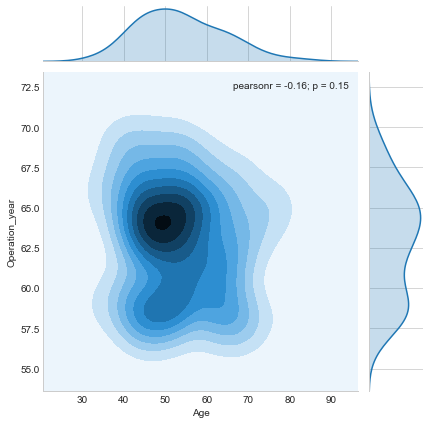

In [34]:
sns.jointplot(x='Age',y='Operation_year',data=haberman_expired,kind='kde')
plt.show()

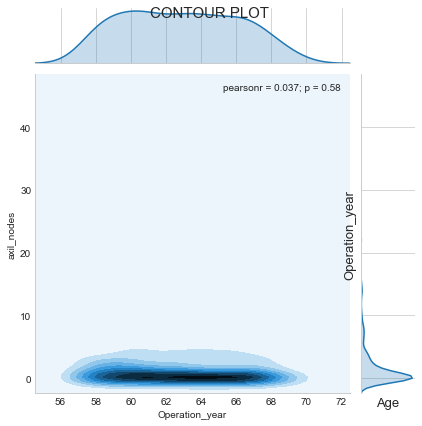

In [35]:
sns.jointplot(x='Operation_year',y='axil_nodes',data=haberman_survived,kind='kde',)
plt.suptitle('CONTOUR PLOT',size=15)
plt.xlabel('Age',size=13)
plt.ylabel('Operation_year',size=13)
plt.show()

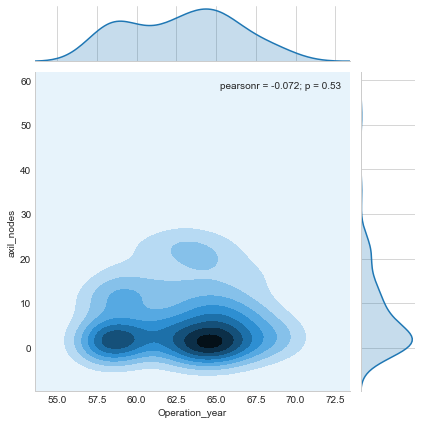

In [36]:
sns.jointplot(x='Operation_year',y='axil_nodes',data=haberman_expired,kind='kde')
plt.show()

Observation:-

with axil_nodes less than 5 and Age 45 to 65 survived more and axil node below 10 survival status is high

with axil_nodes 0 to 10 and Age 45 to 55 has expired more 

### CONCLUSION:-


CONCLUSION:-

The given dataset is imbalenced as it does not contains equal number of data-points for each class.
 
In any dataset By single feature we cannot predict any information. thats the reason we are performing exploratory analysis

The given dataset is not linearly seperable from each class. There are too much overlapping in the data points and hence it is 
very diffucult to classify.

By plotting Exploratory data analysis i can conclude axil_nodes and Age are two important features where we can seperate data by plane/line easily. we can build models on these features

As positive axil_nodes increases the chance of survival of patient decreases

Haberman's Survival Dataset States that survival of patients who had undergone surgery for breast cancer.

By observing all the graphs i conclude that patients having with axil_nodes less than 5 and Age 45 to 65 survived more and axil node below 10 survival status is high